<a href="https://colab.research.google.com/github/MohamedTheSobhy/Analyze-A-B-Test-Results/blob/main/E_Commerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [25]:
data = data.dropna(subset=['CustomerID'])

In [26]:
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

In [27]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [28]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

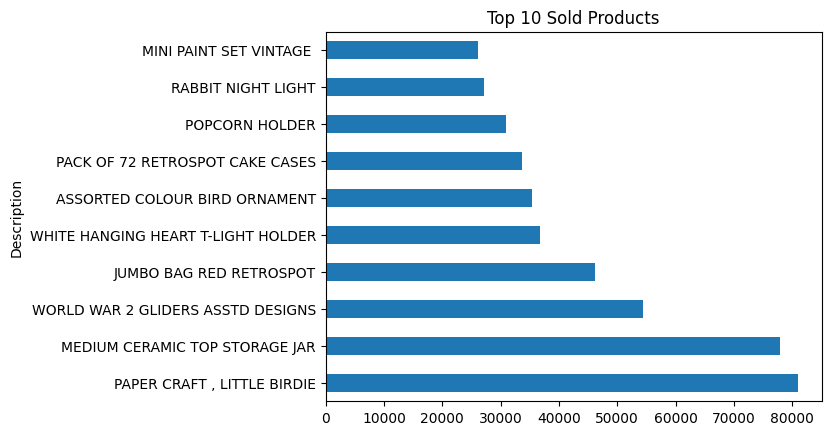

/tmp/ipython-input-328011073.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['TotalPrice'].resample('M').sum()


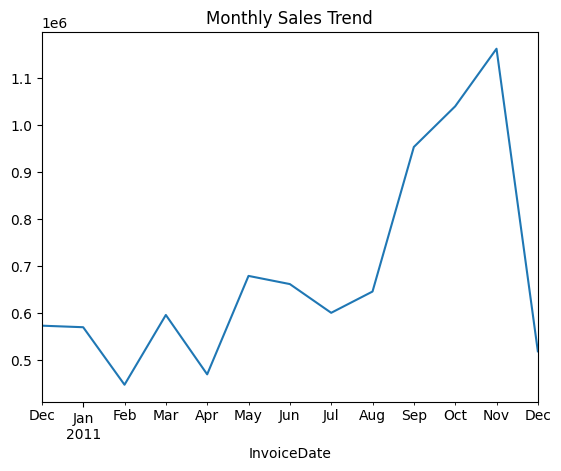

In [29]:
# أكثر 10 منتجات مبيعًا
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh')
plt.title('Top 10 Sold Products')
plt.show()

# المبيعات الشهرية
data.set_index('InvoiceDate', inplace=True)
monthly_sales = data['TotalPrice'].resample('M').sum()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.show()
